# ITCd on RGB images (Local Maxima + Region Growing)

The approach and the specific processing paremeters were taken from the "INDIVIDUAL TREE CROWNS DELINEATION USING LOCAL MAXIMA APPROACH AND SEEDED REGION GROWING TECHNIQUE" by Jan NOVOTNÝ, Jan HANUŠ, Petr LUKEŠ, Věroslav KAPLAN.

In [162]:
INPUT_PATH = '/Volumes/SPACE/02_PROJECT/02_02_ACTIVE/02_FOREST_HYPE/CROPPED_RAW_RGB/'

In [163]:
import numpy as np
from skimage.io import imread
from skimage.segmentation import watershed
from skimage.segmentation import mark_boundaries
from skimage.exposure import equalize_adapthist
from skimage.filters import gaussian
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt

The input of a segmentation algorithm is an average brightness image computed from original data. In the paper authors averaged several selected spectral bands, but we have only RGB channels. By using ```imread``` function from ```skimage.io``` we can load the image ```as_gray```: $Y = 0.2125 R + 0.7154 G + 0.0721 B$.

Additionally, the approach can be tested using only one single channel as the input.

In [171]:
IMAGE_PATH = 'cropped_flight4/cropped_DJI_0007.jpg'

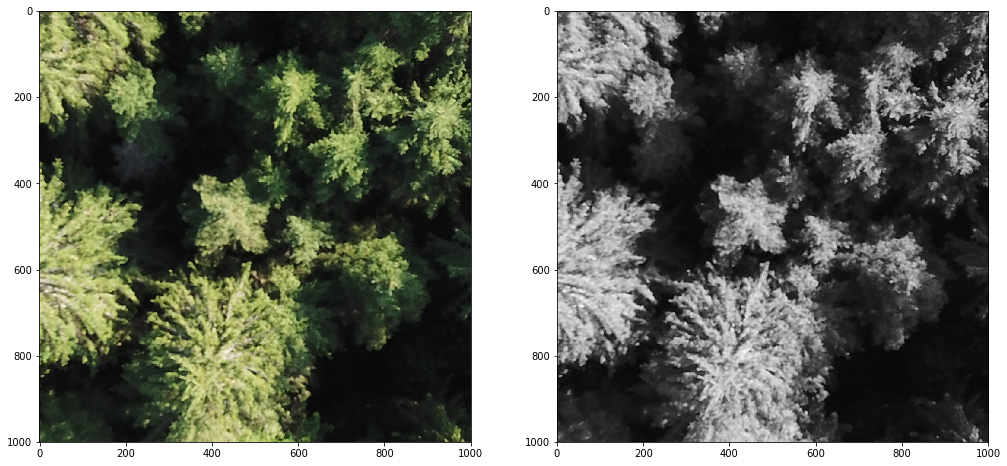

In [172]:
img_color = imread(INPUT_PATH+IMAGE_PATH, as_gray=False)
img_gray = imread(INPUT_PATH+IMAGE_PATH, as_gray=True)

plt.figure(figsize=(17,10))
plt.subplot(121)
plt.imshow(img_color)
plt.subplot(122)
plt.imshow(img_gray, cmap='gray')
plt.show()

## Preprocessing

Adaptive equalization is used to highlight the shaded parts.

/Users/vasilii.mosin/.virtualenvs/forestry/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


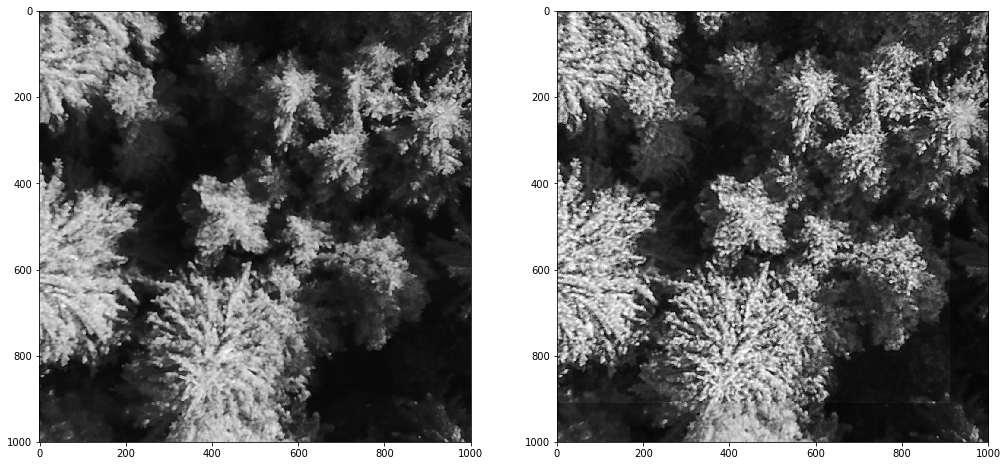

In [173]:
img_equlized = equalize_adapthist(img_gray, kernel_size=11, nbins=256)

plt.figure(figsize=(17,10))
plt.subplot(121)
plt.imshow(img_gray, cmap='gray')
plt.subplot(122)
plt.imshow(img_equlized, cmap='gray')
plt.show()

The lower frequency information is more important for segmentation process. So, the low-pass filter with gaussian kernel is applied.

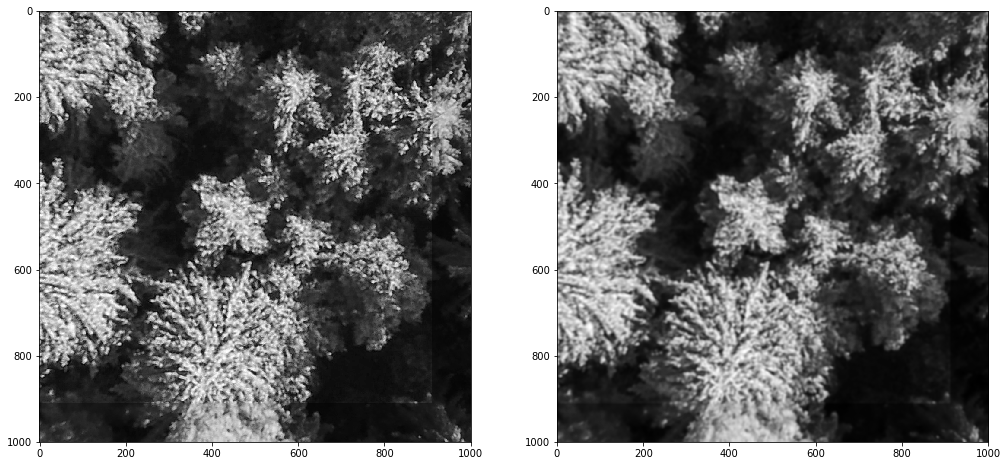

In [174]:
img_gaussian = gaussian(img_equlized, sigma=2)

plt.figure(figsize=(17,10))
plt.subplot(121)
plt.imshow(img_equlized, cmap='gray')
plt.subplot(122)
plt.imshow(img_gaussian, cmap='gray')
plt.show()

## Local Maxima

To calculate a variable window size for LM algorithm Novotny et al. (2011) used the notion of "semivariance" from Wulder et al. (2000). Here we try to implement the expanded idea of this approach from Pouliot et el. (2002) for calculation of the suitable window size for our LM method.

To Do: Implement a variable window size LM from Pouliot et el. (2002). Meanwhile use a fixed window size LM.

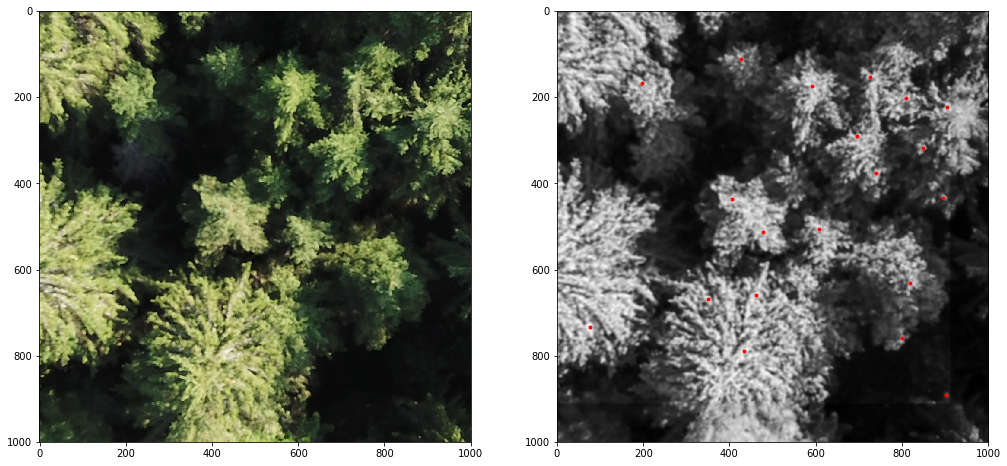

In [175]:
local_maxima = peak_local_max(img_gaussian, min_distance=70)

plt.figure(figsize=(17,10))
plt.subplot(121)
plt.imshow(img_color)
plt.subplot(122)
plt.imshow(img_gaussian, cmap='gray')
plt.plot(local_maxima[:, 1], local_maxima[:, 0], 'r.')
plt.show()

## Region Growing

To Do: Implement our own RG method with custom criterias. Meanwhile use watershed segmentation.

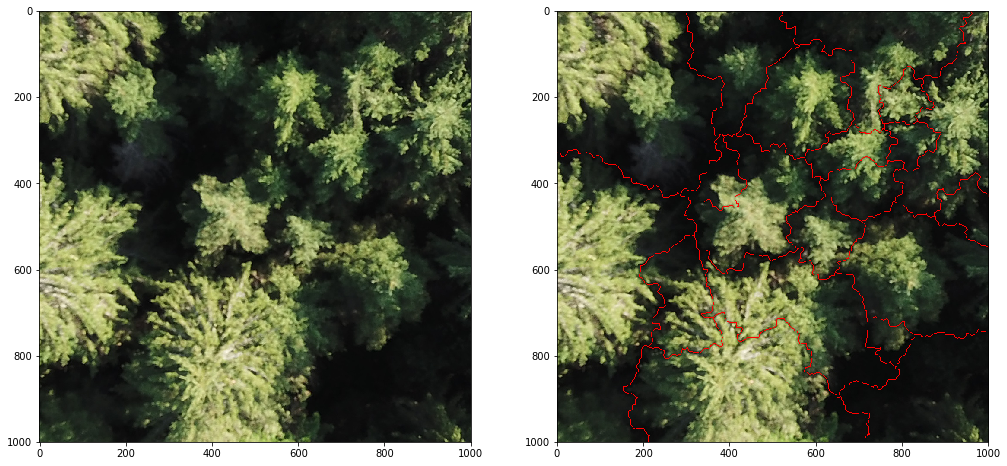

In [183]:
markers = np.zeros_like(img_gray)

for (i, lm) in enumerate(local_maxima):
    markers[lm[0]][lm[1]] = i+1
    
segments = watershed(-img_gaussian, markers)
boundaries = mark_boundaries(img_color, segments, color=(1,0,0))

plt.figure(figsize=(17,10))
plt.subplot(121)
plt.imshow(img_color)
plt.subplot(122)
plt.imshow(boundaries)
plt.show()